In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from glob import glob
from PIL import Image
from torchvision.transforms.functional import to_tensor
import skimage.io as io
import random

In [2]:
path = "/home/hestia/Documents/Experiments/Test/Implement/openpifpaf/openpifpaf/cache_pifpaf_results/17/pifpafSample.pt"

x = torch.load(path)
print(x.shape)

torch.Size([1, 17, 5, 55, 81])


In [3]:
part_index = 0

body_part = x[0,part_index, 0, :,:]

print(body_part.shape)

torch.Size([55, 81])


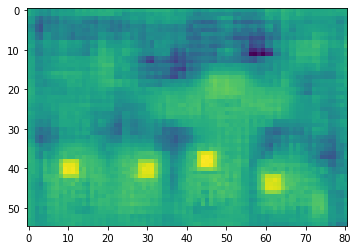

In [4]:
#unrefined heatmaps

plt.imshow(body_part)

(428, 640)


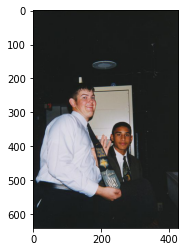

In [5]:
img = '/home/hestia/Documents/Experiments/Test/new/cached_images/coco_train/334474.jpg'
pil_img =  Image.open(img)

plt.imshow(pil_img)
print(pil_img.size)

In [6]:
hr_hm = '/home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_16/72829.npy'
y = np.load(hr_hm)

y.shape

(401, 641)

In [7]:
# torchvision.utils.save_image(torch.tensor(y), "wat_visualization.png", normalize=True)

In [8]:
names = [
    "nose",
    "left_eye",
    "right_eye",
    "left_ear",
    "right_ear",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hip",
    "right_hip",
    "left_knee",
    "right_knee",
    "left_ankle",
    "right_ankle",
]

Keypoint: nose
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_0/334474.npy


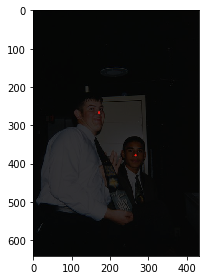

Keypoint: left_eye
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_1/334474.npy


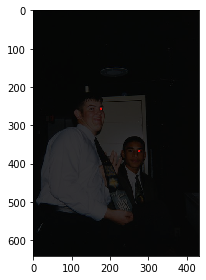

Keypoint: right_eye
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_10/334474.npy


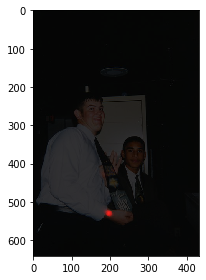

Keypoint: left_ear
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_11/334474.npy


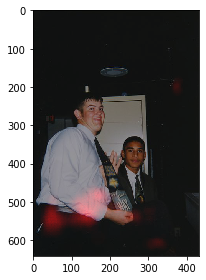

Keypoint: right_ear
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_12/334474.npy


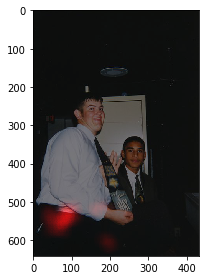

Keypoint: left_shoulder
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_13/334474.npy


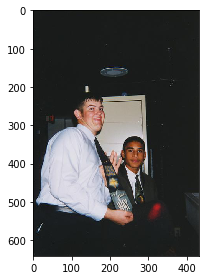

Keypoint: right_shoulder
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_14/334474.npy


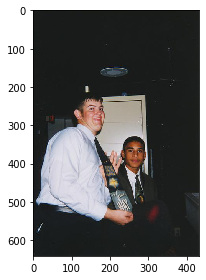

Keypoint: left_elbow
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_15/334474.npy


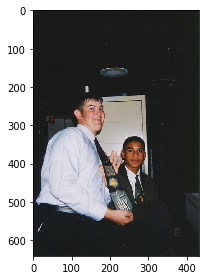

Keypoint: right_elbow
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_16/334474.npy


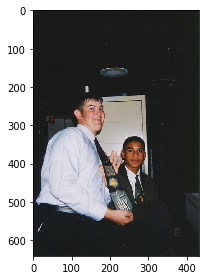

Keypoint: left_wrist
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_2/334474.npy


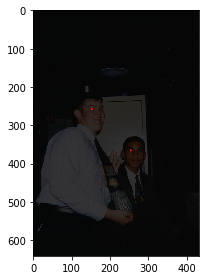

Keypoint: right_wrist
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_3/334474.npy


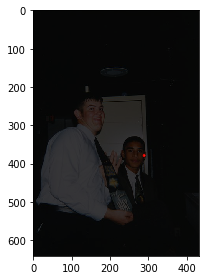

Keypoint: left_hip
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_4/334474.npy


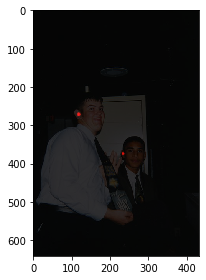

Keypoint: right_hip
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_5/334474.npy


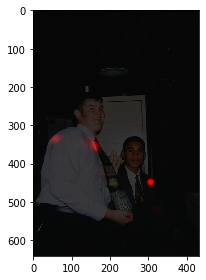

Keypoint: left_knee
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_6/334474.npy


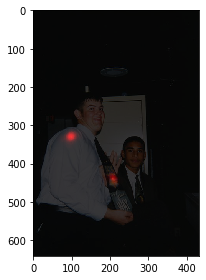

Keypoint: right_knee
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_7/334474.npy


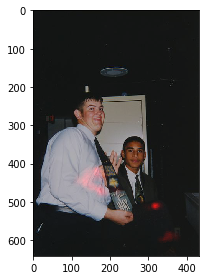

Keypoint: left_ankle
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_8/334474.npy


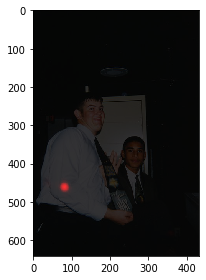

Keypoint: right_ankle
HM path: /home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_9/334474.npy


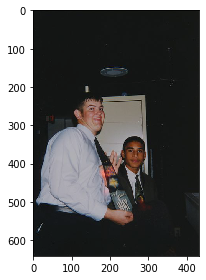

In [9]:
#Visualize HR_PIF Heatmaps
base = "/home/hestia/Documents/Experiments/Test/new/cached_images/coco_train/334474.jpg"

hr_hm = '/home/hestia/Documents/Experiments/Test/new/cache_pifpaf_results/field_*/334474.npy'
files = glob(hr_hm)
files.sort()

# for f,n in zip(files,names):
#     y = np.load(f)
#     h2,w2 = y.shape
#     break
red = np.array([1, 0,0 ]).reshape(1, 1, 3)

for f,n in zip(files,names):
    print(f"Keypoint: {n}")
    print(f"HM path: {f}")
    
    y = np.load(f)
    h2,w2 = y.shape
    
    #resize to match size of both imgs
    b = Image.open(base).resize((w2, h2), Image.BICUBIC)
    b = to_tensor(b).permute(1,2,0).numpy()
    
    
#     h1,w1,c = b.shape
    
#     b = b.mean(axis=2)[:,:,None]
    red_y = red * y[:,:, None]

#     b = to_tensor(b).mean(dim=0).numpy()
#     h = min(h1,h2)
#     w = min(w1,w2)
    
#     print(n, f)
    
#     v = 0.5 * b + 0.5 * red * b * y[:,:, None]
    
    v = 0.8 * red_y + 0.2 * b
    v = (v - v.min()) / (v.max()-v.min())
    io.imshow(v)

    
#     io.imshow(0.7*y+0.3*b)
#     io.imshow(0.7*y[:h,:w]+0.3*b[:h,:w])
    
    io.show()

#     print(v.shape)
#     print('-'*114)

In [10]:
b.shape

(641, 433, 3)